### 1. Import Relevant Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the ggplot style
plt.style.use('ggplot')

### 2. Load the Data

In [2]:
# Load dataset from a CSV file.
wqi = pd.read_csv('/Users/aysebusra/Desktop/Springboard/Capstone_2/water_quality_data_with_classification.csv')

### 3. Exploring the Data

In [3]:
# Look at the dimensions of the dataset. 
wqi.shape

(1068, 16)

The dataset has 1068 rows and 16 columns.

In [4]:
# View the first few rows of the DataFrame
wqi.head()

,Station_no,Type,Date,Temp (°C),Cond (μS/cm),DO (mg/L),pH,NO2 (mg/L),NO3 (mg/L),TN (mg/L),TP (mg/L),TSS (mg/L),BOD (mg/L),Turbidity (NTU),WQI,Water Quality Classification
0,242,River,2019-10-03,27.03,23.85,6.72,7.85,0.1,0.1,0.7,0.1,5.5,2.0,1.7,36.042485,Good (3)
1,242,River,2019-10-03,27.24,25.01,6.36,7.81,0.1,0.1,0.8,0.1,6.0,2.0,1.7,36.878936,Good (3)
2,242,River,2019-10-03,27.22,25.29,6.36,7.80,0.1,0.1,0.8,0.1,6.5,2.0,2.7,39.179552,Good (3)
3,350,River,2019-10-03,27.07,19.94,6.50,7.81,0.1,0.1,0.8,0.1,6.0,2.0,1.7,36.759645,Good (3)
4,350,River,2019-10-03,27.08,20.11,6.47,7.82,0.1,0.1,0.8,0.1,6.0,2.0,1.9,37.212797,Good (3)


Dataset contains various water quality parameters recorded at different stations and dates, along with a Water Quality Index (WQI) and a Water Quality Classification based on that index.

In [5]:
# Get information about the columns, data types, and the presence of missing values.
wqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Station_no                    1068 non-null   int64  
 1   Type                          1068 non-null   object 
 2   Date                          1068 non-null   object 
 3   Temp (°C)                     1068 non-null   float64
 4   Cond (μS/cm)                  1068 non-null   float64
 5   DO (mg/L)                     1068 non-null   float64
 6   pH                            1068 non-null   float64
 7   NO2 (mg/L)                    1068 non-null   float64
 8   NO3 (mg/L)                    1068 non-null   float64
 9   TN (mg/L)                     1068 non-null   float64
 10  TP (mg/L)                     1068 non-null   float64
 11  TSS (mg/L)                    1068 non-null   float64
 12  BOD (mg/L)                    1068 non-null   float64
 13  Tur

There are no missing values in the dataset.The majority of columns contain numerical data, representing various water quality measurements. Most of the columns contain numerical data, with 12 columns having float64 data type and 1 column having int64 data type.Three columns (Type, Date, and Water Quality Classification) are of object data type.

In [6]:
# Generate summary statistics for numerical columns.
wqi.describe()

,Station_no,Temp (°C),Cond (μS/cm),DO (mg/L),pH,NO2 (mg/L),NO3 (mg/L),TN (mg/L),TP (mg/L),TSS (mg/L),BOD (mg/L),Turbidity (NTU),WQI
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,299.235955,24.835563,11.949363,6.690403,7.886189,0.031559,0.106297,0.798304,0.111243,13.219101,1.451966,3.727243,51.516283
std,53.928209,4.468817,11.543230,1.570981,0.324228,0.025151,0.116321,0.402122,0.061006,16.566803,0.749111,4.873524,29.901399
min,242.000000,10.940000,0.000000,0.000000,6.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,12.865298
25%,242.000000,21.440000,1.213000,5.760000,7.730000,0.025000,0.025000,0.600000,0.080000,5.000000,1.200000,1.200000,35.961673
50%,350.000000,25.510000,8.620000,6.755000,7.900000,0.025000,0.055000,0.800000,0.100000,8.500000,1.200000,2.770000,43.561196
75%,350.000000,28.692500,20.434750,7.702500,8.052500,0.030000,0.160000,1.000000,0.140000,14.500000,1.500000,4.722500,56.591787
max,350.000000,32.510000,54.410000,13.780000,8.990000,0.100000,0.760000,6.210000,0.530000,179.000000,8.600000,80.000000,343.567791


### 4. Preparing the Data

#### 4.1 Dropping Irrelevant columns

In [7]:
wqi = wqi[['Station_no', 'Date', 'Cond (μS/cm)', 'DO (mg/L)',
       'pH', 'NO2 (mg/L)', 'NO3 (mg/L)', 'TN (mg/L)', 'TP (mg/L)',
       'TSS (mg/L)', 'BOD (mg/L)', 'Turbidity (NTU)', 'WQI',
       'Water Quality Classification']].copy()

In [8]:
# Look at the dimensions of the dataset. 
wqi.shape

(1068, 14)

After dropping the irrelevant columns, the DataFrame wqi now has dimensions of (1068, 14), indicating it contains 1068 rows and 14 columns.

In [9]:
# Get information about the columns, data types, and the presence of missing values.
wqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Station_no                    1068 non-null   int64  
 1   Date                          1068 non-null   object 
 2   Cond (μS/cm)                  1068 non-null   float64
 3   DO (mg/L)                     1068 non-null   float64
 4   pH                            1068 non-null   float64
 5   NO2 (mg/L)                    1068 non-null   float64
 6   NO3 (mg/L)                    1068 non-null   float64
 7   TN (mg/L)                     1068 non-null   float64
 8   TP (mg/L)                     1068 non-null   float64
 9   TSS (mg/L)                    1068 non-null   float64
 10  BOD (mg/L)                    1068 non-null   float64
 11  Turbidity (NTU)               1068 non-null   float64
 12  WQI                           1068 non-null   float64
 13  Wat

'Date' column in the DataFrame is currently stored as an object data type, which typically indicates that it's being treated as a string. it's beneficial to convert the 'Date' column to a datetime data type.

In [10]:
# Convert the 'Date' column to datetime format.
wqi['Date'] = pd.to_datetime(wqi['Date'])

#### 4.2 Identifying duplicated values

In [11]:
# Specify the subset of columns to consider for identifying duplicates
subset_cols = ['Cond (μS/cm)', 'DO (mg/L)', 'pH', 'NO2 (mg/L)', 
               'NO3 (mg/L)', 'TN (mg/L)', 'TP (mg/L)', 'TSS (mg/L)', 
               'BOD (mg/L)', 'Turbidity (NTU)', 'WQI']

# Check for duplicate rows based on the subset of columns
duplicate_rows = wqi[wqi.duplicated(subset=subset_cols, keep=False)]

In [13]:
# Drop duplicates based on the subset of columns, keeping only the first occurrence
wqi.drop_duplicates(subset=subset_cols, keep='first', inplace=True)
wqi = wqi.copy()

In [14]:
# Look at the dimensions of the dataset. 
wqi.shape

(1025, 14)

After dropping the duplicated values, the DataFrame wqi now has dimensions of (1025, 14), indicating it contains 1025 rows and 14 columns.

#### 4.3 Choosing a dependent variable

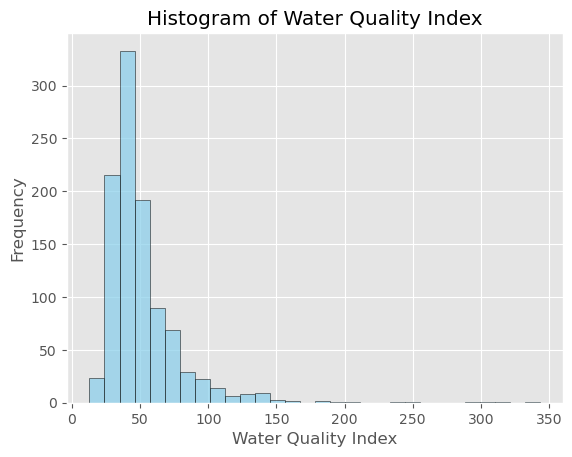

In [19]:
# Plot histogram of dependent variable, Water Quality Index
plt.hist(wqi['WQI'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Water Quality Index')
plt.ylabel('Frequency')
plt.title('Histogram of Water Quality Index')
plt.show()

The distribution of the Water Quality Index (WQI) is right-skewed, with the majority of the data concentrated between 35 and 56. Additionally, the range of values changes from 12.5 to 343 and the mean value of approximately 51.

### 4. Visualizing the Data

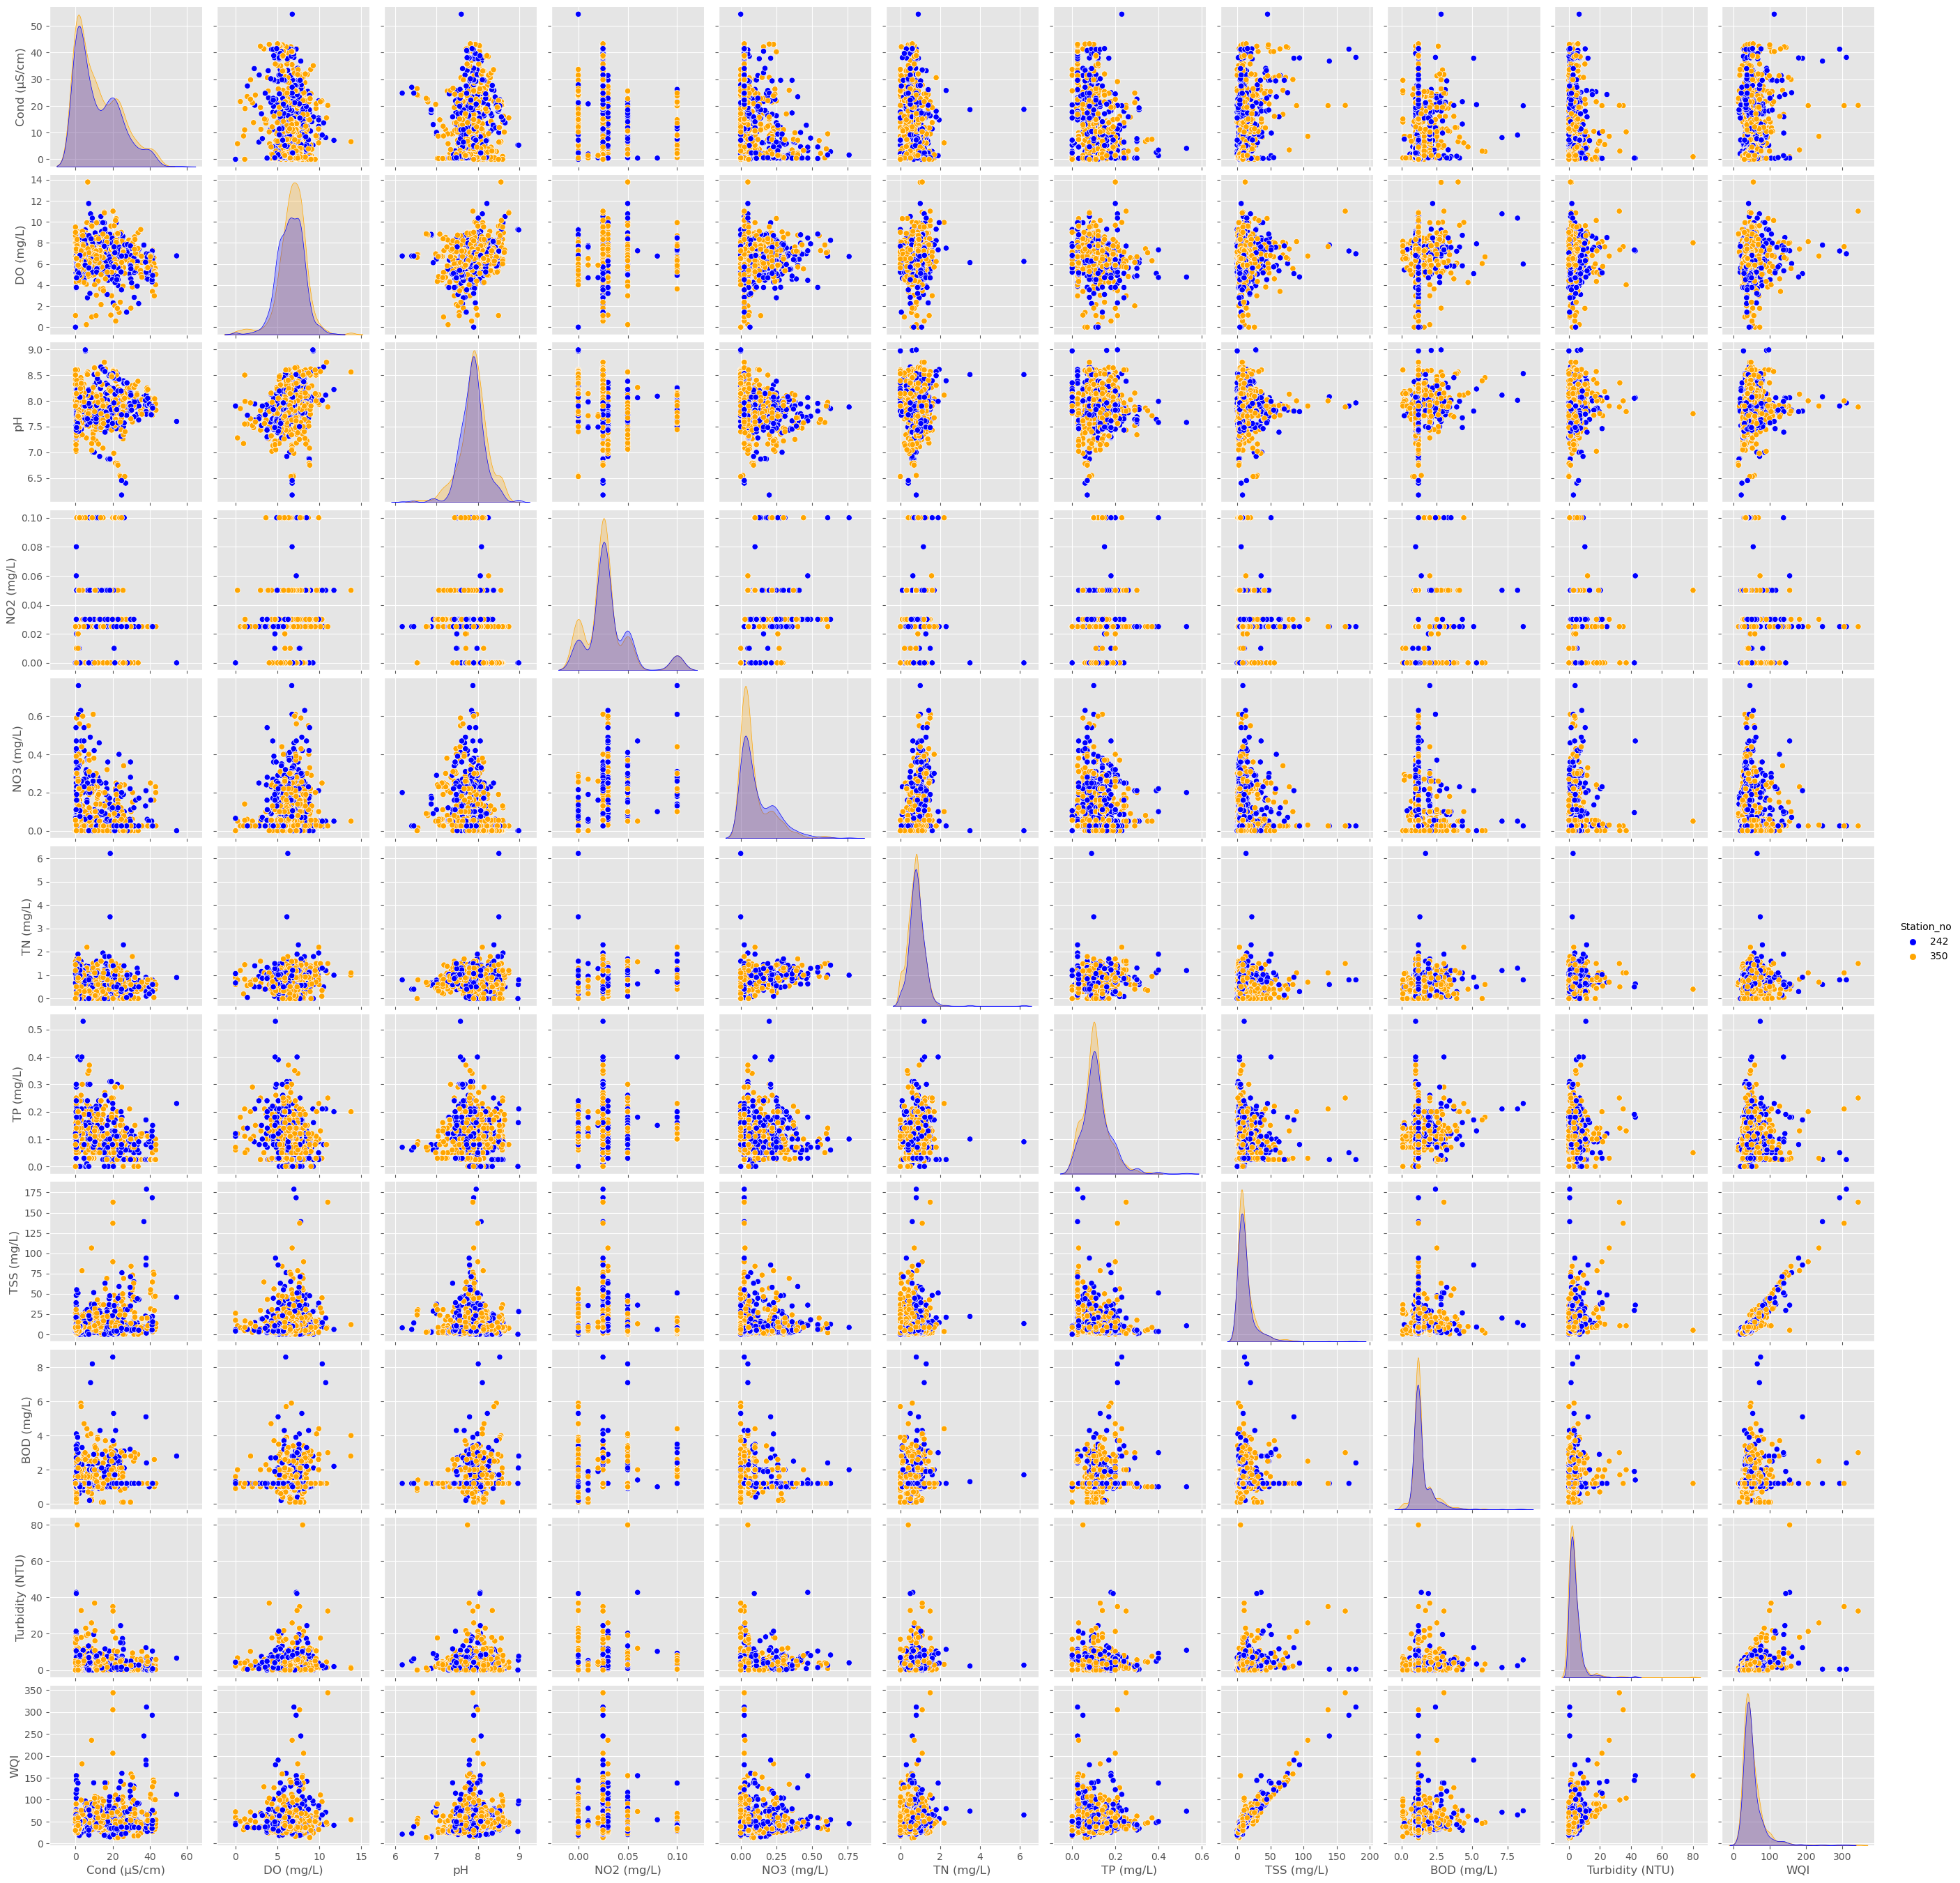

In [57]:
# Filter data by station numbers 242 and 350
filtered_data = wqi[wqi['Station_no'].isin([242, 350])]

# List of numerical columns
numerical_columns = ['Cond (μS/cm)', 'DO (mg/L)', 'pH', 'NO2 (mg/L)', 
                     'NO3 (mg/L)', 'TN (mg/L)', 'TP (mg/L)', 'TSS (mg/L)', 
                     'BOD (mg/L)', 'Turbidity (NTU)', 'WQI']

# Plot pairplot for numerical features for each station
sns.pairplot(data=filtered_data, hue='Station_no', vars=numerical_columns, palette=['blue', 'orange'])
plt.show()

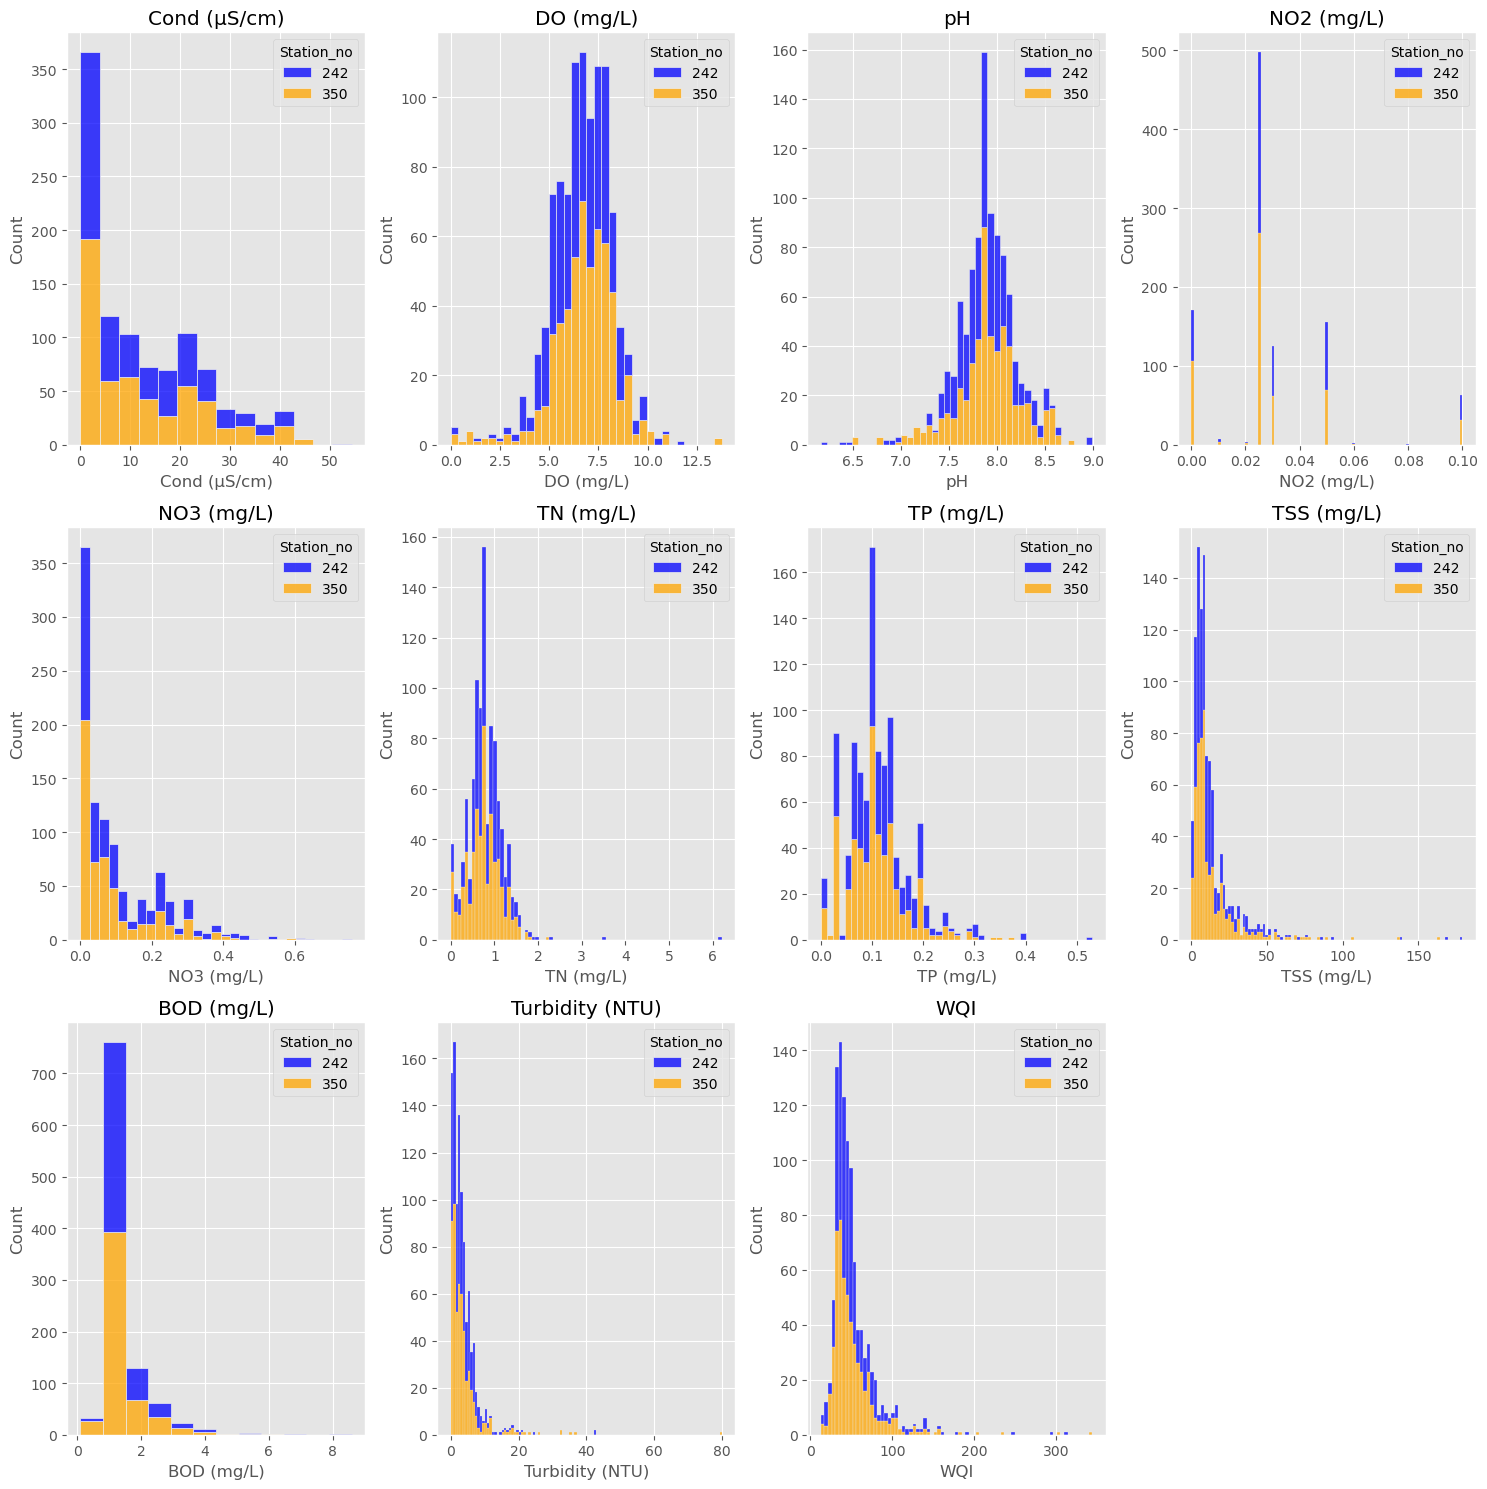

In [33]:
# Filter data by station numbers 242 and 350
filtered_data = wqi[wqi['Station_no'].isin([242, 350])]

# List of numerical columns
numerical_columns = ['Cond (μS/cm)', 'DO (mg/L)', 'pH', 'NO2 (mg/L)', 
                     'NO3 (mg/L)', 'TN (mg/L)', 'TP (mg/L)', 'TSS (mg/L)', 
                     'BOD (mg/L)', 'Turbidity (NTU)', 'WQI']

# Plot histograms for numerical for each station
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 4, i + 1)
    sns.histplot(data=filtered_data, x=col, hue='Station_no', multiple='stack', palette=['blue', 'orange'])
    plt.title(col)
plt.tight_layout()
plt.show()

Observations based on the histogram:

* Some variables have a skewed distribution, such as 'Cond', 'NO3', 'TN', 'TP', 'TSS', 'BOD', 'Turbidity', 'WQI'. This means that data is not symmetrically distributed around the mean, most of the observations are concentrated on one side of the distribution, while some outliers are on the other side. For example, the right-skewed distribution of 'Cond' suggests that most observations have lower values, with some higher values present as outliers.

* NO2 has a multimodal distribution. This means that there are multiple peaks or modes in the distribution. This suggests the presence of distinct groups or clusters within the data.

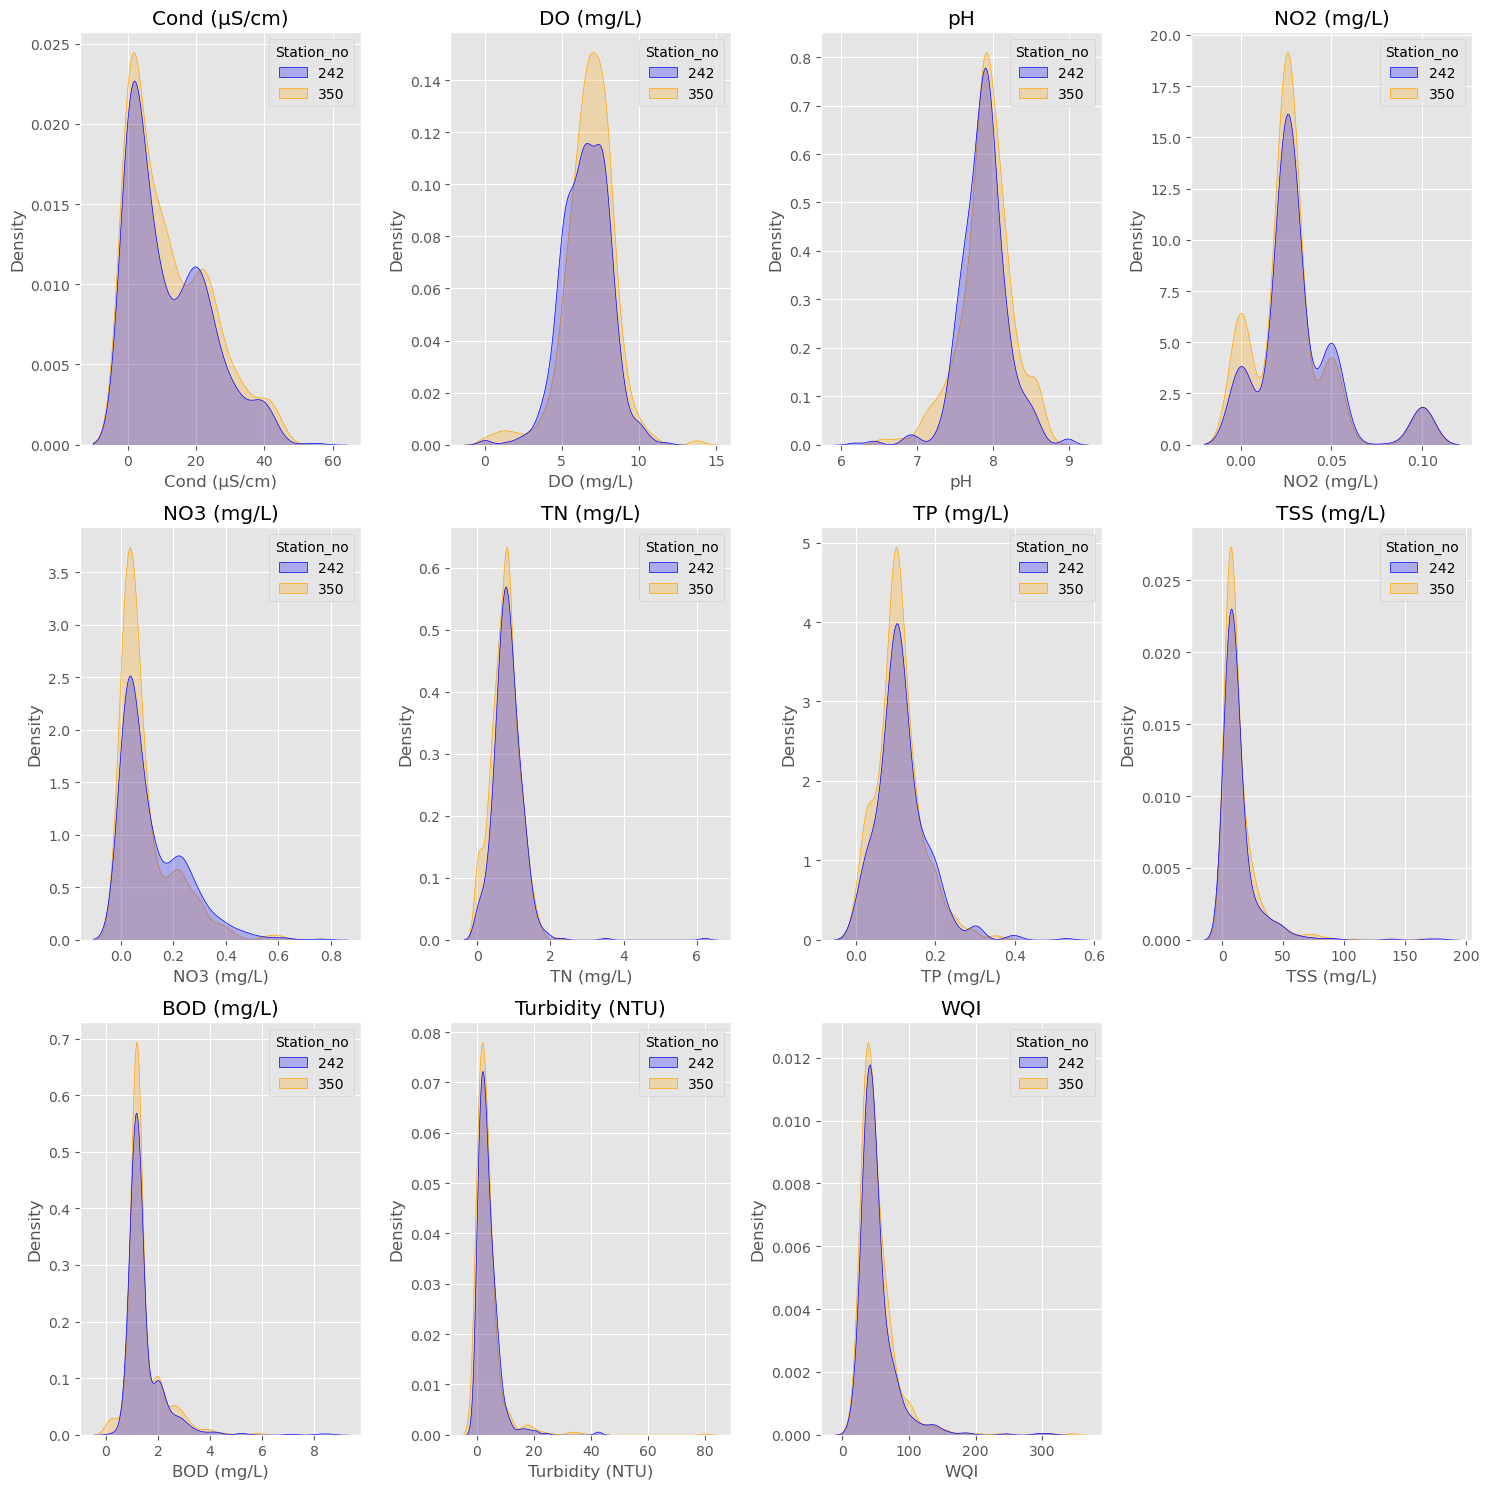

In [35]:
# Plot KDE plots for numerical features for each station
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 4, i + 1)
    sns.kdeplot(data=filtered_data, x=col, hue='Station_no', fill=True, palette=['blue', 'orange'])
    plt.title(col)
plt.tight_layout()
plt.show()

KDE plots provided similar insights to those observed in histograms regarding skewed distributions and multimodal distributions.

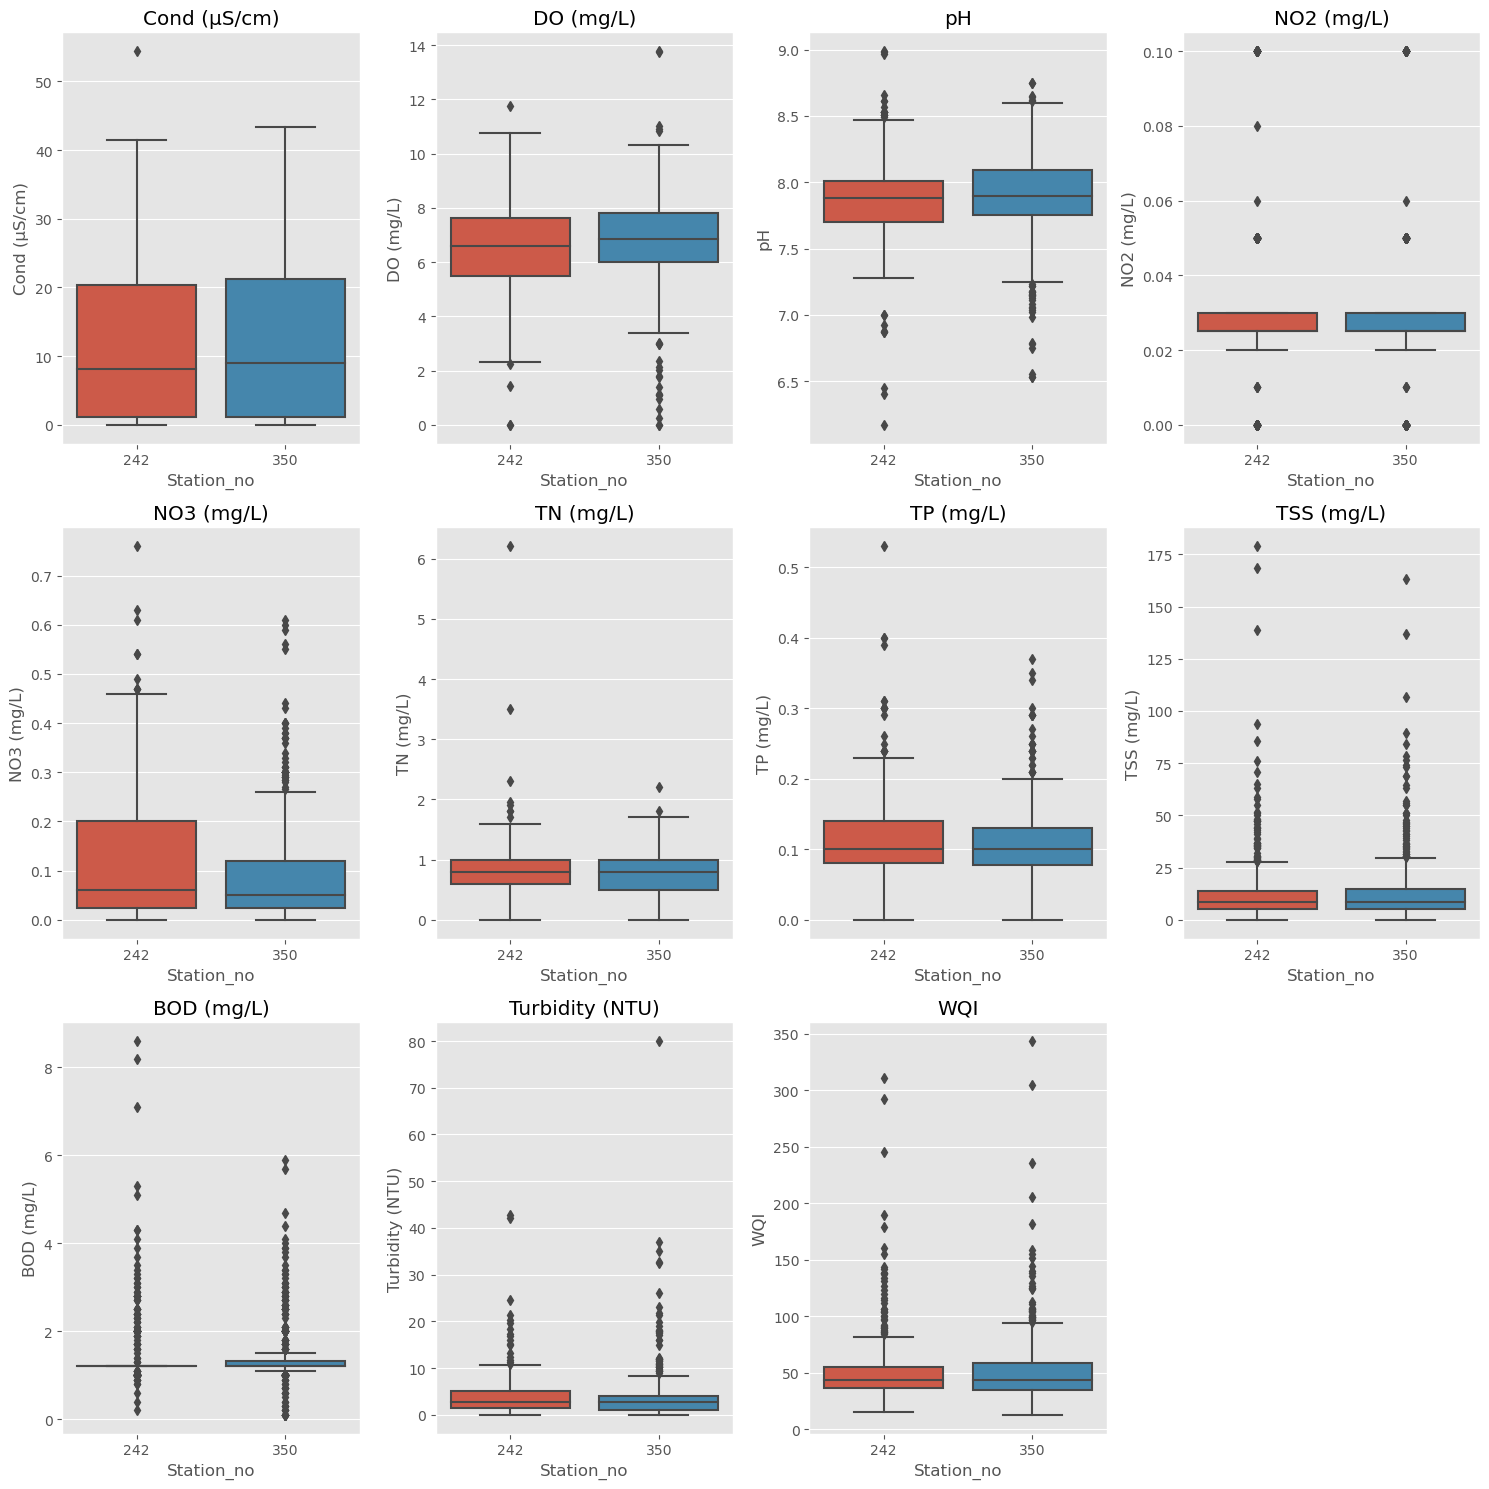

In [40]:
# Plot boxplots for each numerical feature for each station
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=filtered_data, x='Station_no', y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

Observations based on the boxplot:

* Most of the variables have outliers that are far from other data. For example, DO has some values above the third quartile, whereas do has some values below the first quartile. These outliers may indicate errors in data collection or measurement, or may represent some special cases or events in water quality.

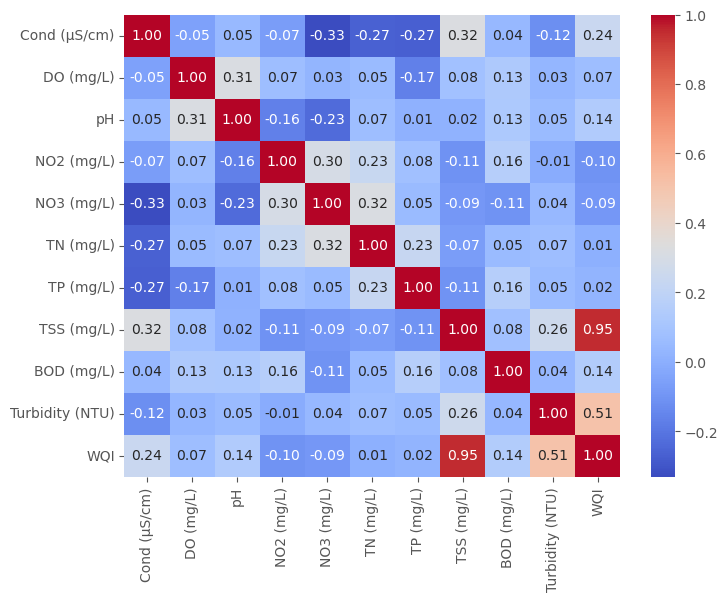

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(wqi[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

From the provided correlations, we can see that WQI has a very strong positive correlation with TSS (Total Suspended Solids) and a moderate positive correlation with Turbidity. The correlations with other variables are weak (Cond, pH, NO2, NO3, BOD) or very weak (DO, TN, TP).

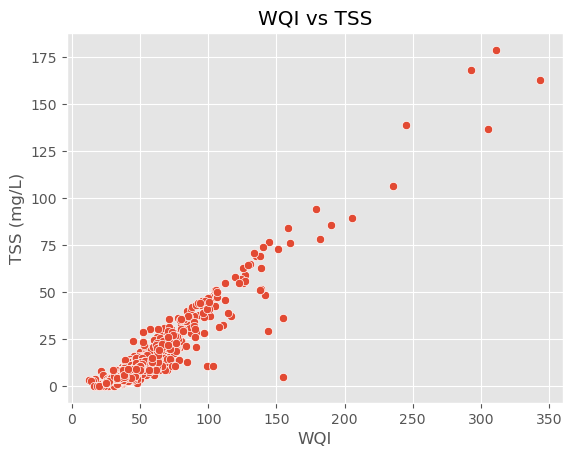

In [52]:
# Scatterplot between WQI and TSS
sns.scatterplot(data=wqi, x='WQI', y='TSS (mg/L)')
plt.title('WQI vs TSS')
plt.xlabel('WQI')
plt.ylabel('TSS (mg/L)')
plt.show()

We can see a positive correlation between WQI and TSS. This means that as TSS increases, WQI tends to increase as well, and vice versa. While the outliers exist in the data, the positive correlation line in the scatter plot indicates that the outliers may not change the fundamental relationship between the variables. Knowing the value of TSS can provide valuable information for predicting WQI levels in water samples.

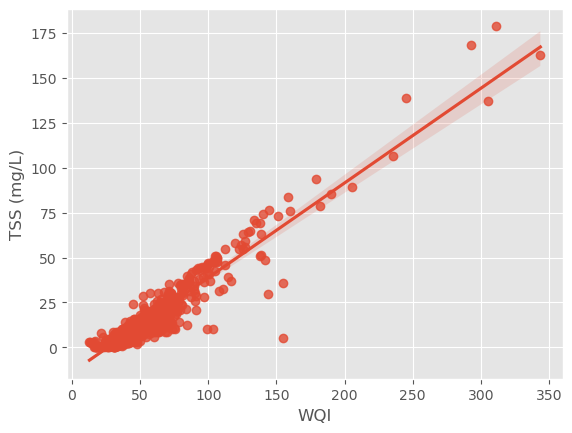

In [53]:
# Create a regression plot to visualize the relationship between the 'WQI' and 'TSS (mg/L)'.
sns.regplot(data=wqi, x='WQI', y='TSS (mg/L)')
plt.show()

While the regression line provides a good overall approximation of the relationship between the variables, there are some individual data points that deviate from the line. 

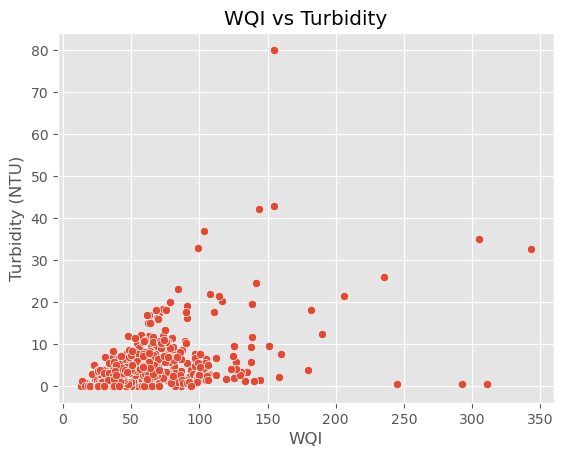

In [54]:
# Scatterplot between WQI and Turbidity
sns.scatterplot(data=wqi, x='WQI', y='Turbidity (NTU)')
plt.title('WQI vs Turbidity')
plt.xlabel('WQI')
plt.ylabel('Turbidity (NTU)')
plt.show()

Even though the relationship between turbidity and WQI may not be perfectly linear, the general trend indicates that as turbidity increases, the corresponding WQI tends to increase as well. This suggests that higher levels of turbidity are associated with poorer water quality, as indicated by higher WQI values. While the correlation between WQI and turbidity may not be very strong, turbidity can still provide valuable information for predicting WQI levels in water samples.

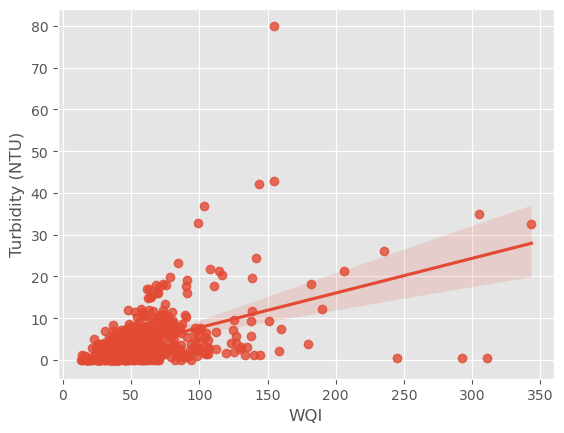

In [55]:
sns.regplot(data=wqi, x='WQI', y ='Turbidity (NTU)')
plt.show()

There is a positive relationship between WQI and turbidity, but the slope of the trendline is not as pronounced as it would be in a plot with a strong correlation.